# Mushroom Classification

## Attribute Information:

class: edible=e, poisonous=p

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv("mushrooms.csv")

In [10]:
dataset

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


### 2. preprocessing

In [11]:
# checking null values
dataset.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [12]:
dataset.drop_duplicates()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### There is no null and duplicate values
#### All Features are categorical

### 3. Visualization

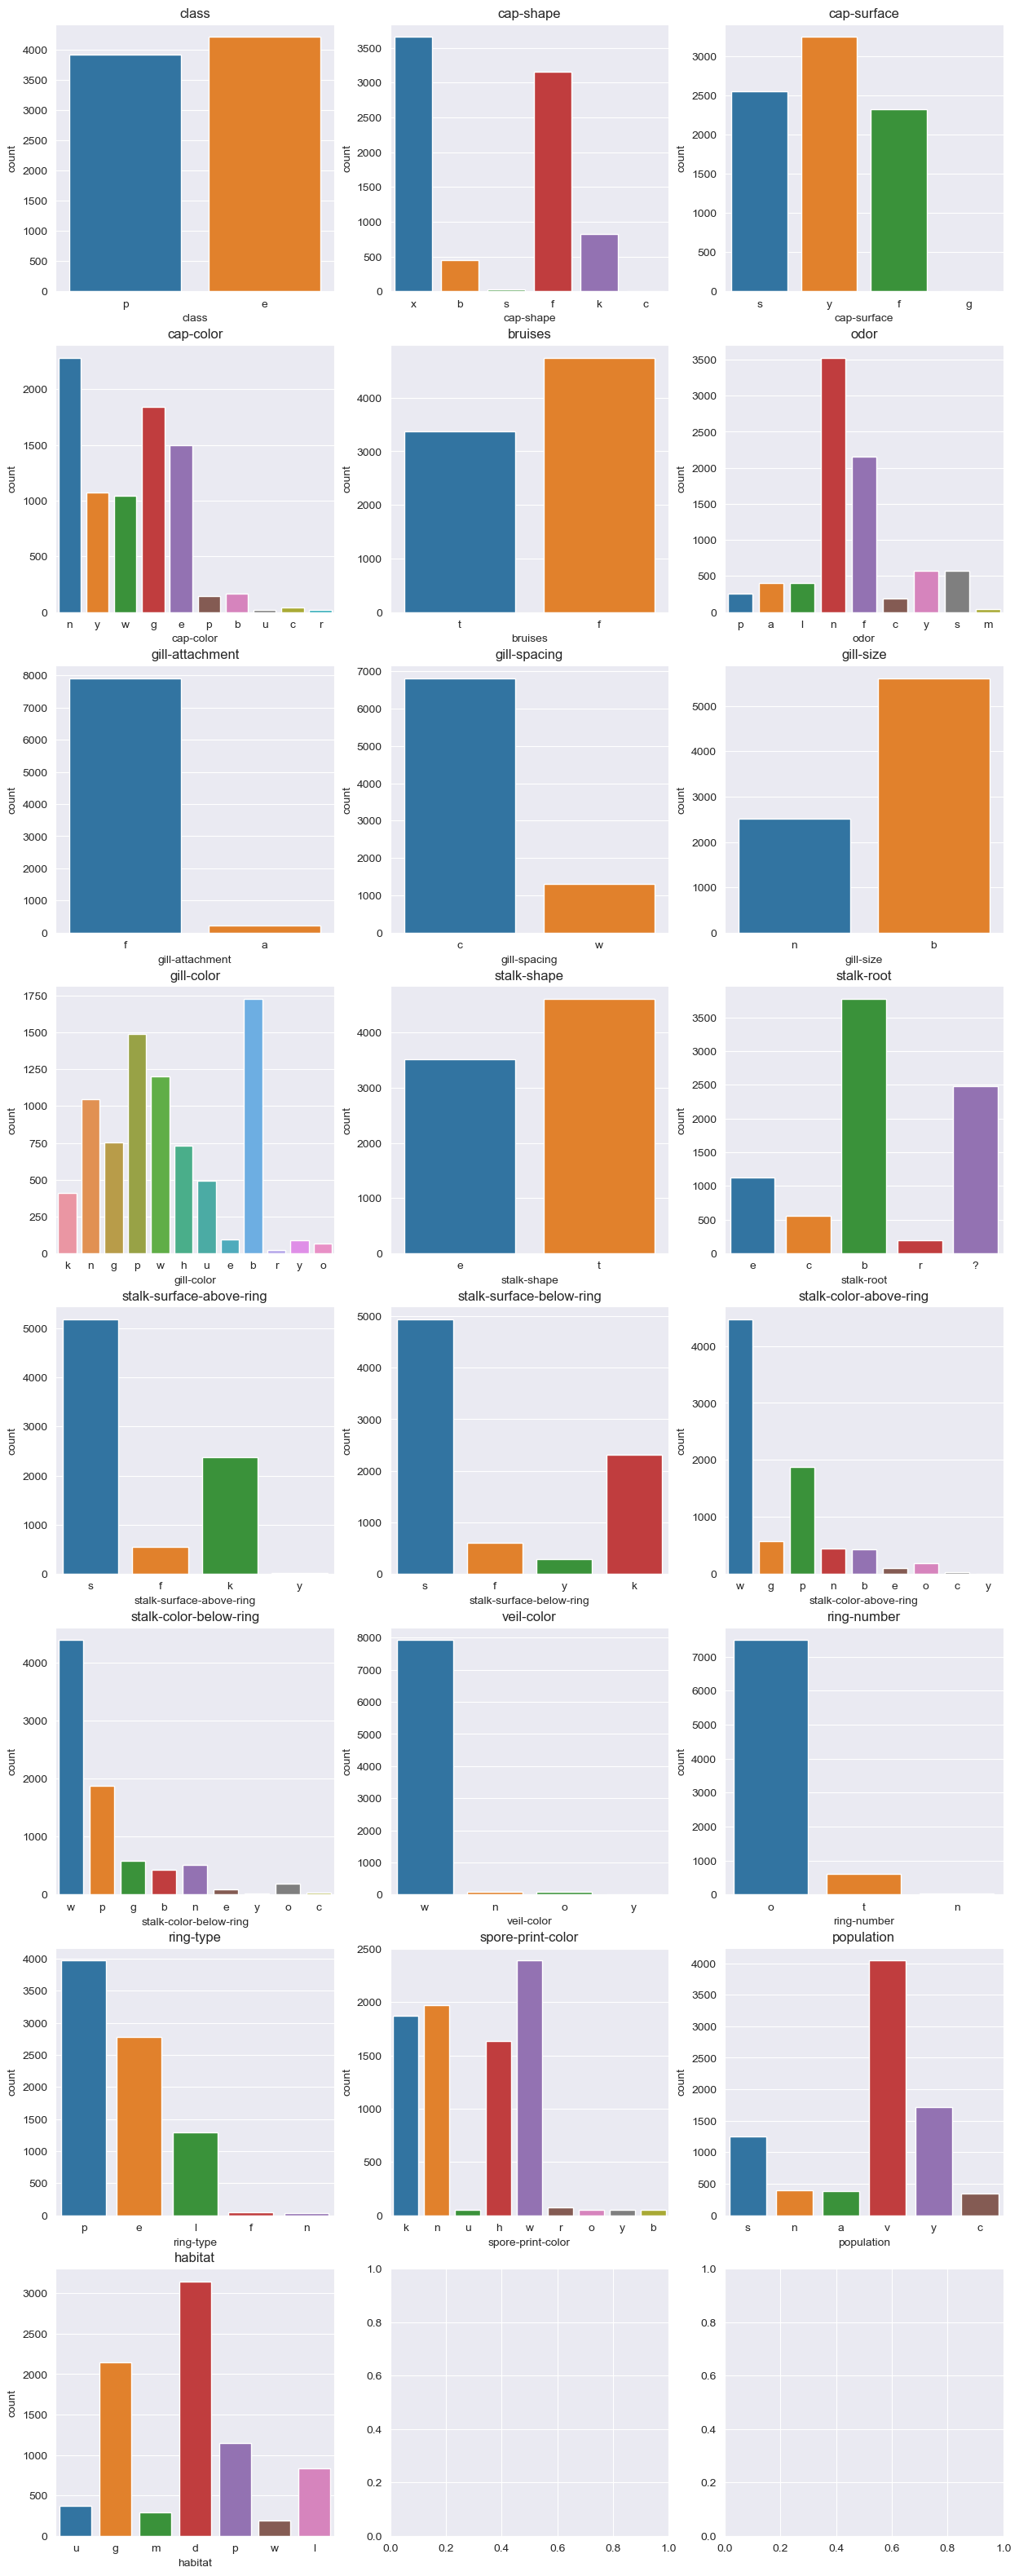

In [24]:
columns_list = dataset.columns
num_rows = (len(columns_list) + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows*5))

axes = axes.flatten()

# Loop through each column and plot the countplot on the corresponding axis
for i, column in enumerate(columns_list):
    sns.countplot(x=column, data=dataset, ax=axes[i])
    axes[i].set_title(column)

# Show the plots
plt.show()


#### veil-type features has only one value , we can drop it

In [19]:
dataset.drop(["veil-type"],axis=1,inplace=True)

C:\Users\adils\AppData\Local\Temp\ipykernel_27656\2911790877.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=dataset.corr())


ValueError: zero-size array to reduction operation fmin which has no identity

#### All featutres are categorical encoding is required. Label Encoder is best way to do it in this case

In [33]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [27]:
mappings=list()
encoder=LabelEncoder()
for col in range(len(dataset.columns)):
    dataset[dataset.columns[col]] = encoder.fit_transform(dataset[dataset.columns[col]])
    mappings_dict = {index: label for index, label in enumerate(encoder.classes_)}
    mappings.append(mappings_dict)

In [28]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y'},
 {0: 'd

In [30]:
X=dataset.drop("class",axis=1)
y=dataset["class"]

In [32]:
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

### Train-test Split

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [35]:
print(X_train.shape)
print(X_test.shape)

(6499, 21)
(1625, 21)


### Model Fitting

In [36]:
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import  DecisionTreeClassifier
from sklearn.svm import  SVC
from sklearn.ensemble import RandomForestClassifier

In [37]:
models=[
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC(),
    RandomForestClassifier()
]

In [44]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [40]:
for index,model in enumerate(models):
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    print(f"{models[index]} Acucracy score :{accuracy_score(y_test,pred)}")

LogisticRegression() Acucracy score :0.9587692307692308
DecisionTreeClassifier() Acucracy score :1.0
SVC() Acucracy score :1.0
RandomForestClassifier() Acucracy score :1.0


#### for classfication problem f1-score and confusion matrix is better matrics for perofmance of model

LogisticRegression()
Acucracy score :0.9587692307692308


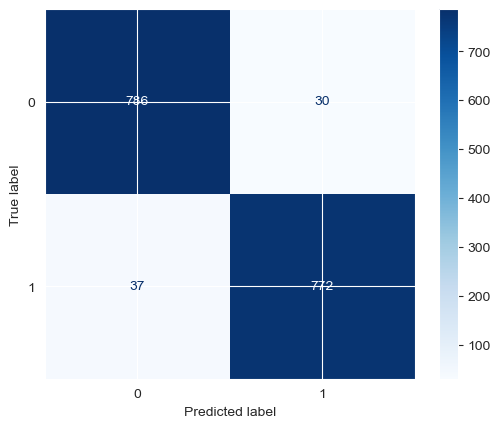

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.95      0.96       809

    accuracy                           0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625

DecisionTreeClassifier()
Acucracy score :1.0


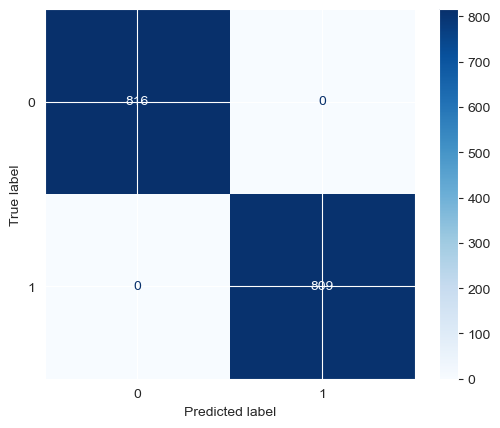

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       1.00      1.00      1.00       809

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

SVC()
Acucracy score :1.0


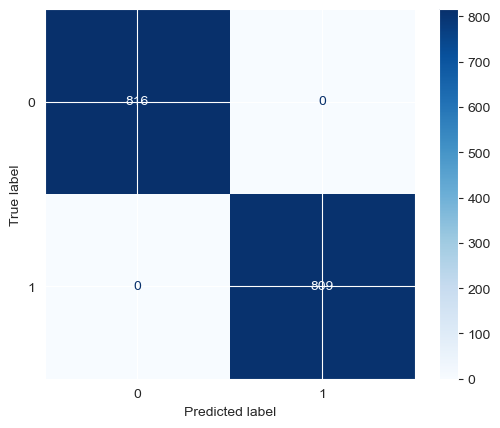

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       1.00      1.00      1.00       809

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

RandomForestClassifier()
Acucracy score :1.0


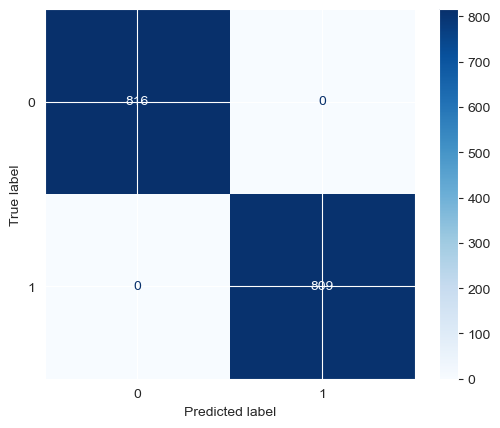

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       816
           1       1.00      1.00      1.00       809

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [48]:
for index,model in enumerate(models):
    print("===============")
    print(f"{model}")
    print("===============")
    pred=model.predict(X_test)
    print(f"Acucracy score :{accuracy_score(y_test,pred)}")
    cm = confusion_matrix(y_test, pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues')
    plt.show()
    print(classification_report(y_test,pred))